In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("stroke_prediction.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
pd.crosstab(df["gender"],df["stroke"],margins = True)

stroke,0,1,All
gender,,,
Female,25234,431,25665
Male,17372,352,17724
Other,11,0,11
All,42617,783,43400


In [5]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [6]:
df["gender"]

0          Male
1          Male
2        Female
3        Female
4          Male
          ...  
43395    Female
43396    Female
43397    Female
43398      Male
43399    Female
Name: gender, Length: 43400, dtype: object

In [7]:
df["gender"].value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

In [8]:
df["age_category"] = pd.cut(df["age"],
                           bins = [0,11,19,30,40,60,90],
                           labels = ["childs","teens","youngs","middles","seniors","oldage"])

In [9]:
df[["age","age_category"]]

,age,age_category
0,3.0,childs
1,58.0,seniors
2,8.0,childs
3,70.0,oldage
4,14.0,teens
...,...,...
43395,10.0,childs
43396,56.0,seniors
43397,82.0,oldage
43398,40.0,middles


In [10]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_category'],
      dtype='object')

In [11]:
df =df.drop(["id","gender"],axis = 1)

In [12]:
childrens = df[(df["age"]>=0) & (df["age"]<=11)]
childrens

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
0,3.00,0,0,No,children,Rural,95.12,18.0,NaN,0,childs
2,8.00,0,0,No,Private,Urban,110.89,17.6,NaN,0,childs
33,3.00,0,0,No,children,Urban,73.74,16.0,NaN,0,childs
42,4.00,0,0,No,children,Rural,79.17,20.0,NaN,0,childs
73,11.00,0,0,No,children,Rural,79.03,16.5,NaN,0,childs
...,...,...,...,...,...,...,...,...,...,...,...
43369,1.72,0,0,No,children,Rural,81.38,17.8,NaN,0,childs
43376,3.00,0,0,No,children,Rural,83.32,21.3,NaN,0,childs
43382,9.00,0,0,No,children,Urban,68.49,16.8,NaN,0,childs
43391,6.00,0,0,No,children,Urban,77.48,19.1,NaN,0,childs


In [13]:
childrens = df[df["age_category"]=="childs"]
childrens

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
0,3.00,0,0,No,children,Rural,95.12,18.0,NaN,0,childs
2,8.00,0,0,No,Private,Urban,110.89,17.6,NaN,0,childs
33,3.00,0,0,No,children,Urban,73.74,16.0,NaN,0,childs
42,4.00,0,0,No,children,Rural,79.17,20.0,NaN,0,childs
73,11.00,0,0,No,children,Rural,79.03,16.5,NaN,0,childs
...,...,...,...,...,...,...,...,...,...,...,...
43369,1.72,0,0,No,children,Rural,81.38,17.8,NaN,0,childs
43376,3.00,0,0,No,children,Rural,83.32,21.3,NaN,0,childs
43382,9.00,0,0,No,children,Urban,68.49,16.8,NaN,0,childs
43391,6.00,0,0,No,children,Urban,77.48,19.1,NaN,0,childs


In [14]:
pd.crosstab(childrens["age_category"],df["stroke"],margins=True)

stroke,0,1,All
age_category,,,
childs,4927,1,4928
All,4927,1,4928


In [15]:
pd.crosstab(df["age_category"],df["stroke"],margins = True)

stroke,0,1,All
age_category,,,
childs,4927,1,4928
teens,3582,1,3583
youngs,5723,2,5725
middles,5500,21,5521
seniors,12953,179,13132
oldage,9932,579,10511
All,42617,783,43400


In [16]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'age_category'],
      dtype='object')

In [17]:
df["hypertension"].value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

In [18]:
df["work_type"].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [19]:
df.groupby("avg_glucose_level")["stroke"].describe()

,count,mean,std,min,25%,50%,75%,max
avg_glucose_level,,,,,,,,
55.00,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
55.01,5.0,0.2,0.447214,0.0,0.0,0.0,0.0,1.0
55.02,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
55.03,6.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
55.04,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
278.56,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
279.66,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
281.18,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [20]:
df.groupby("stroke")["avg_glucose_level"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,42617.0,104.021590,42.608788,55.00,77.50,91.47,111.67,291.05
1,783.0,129.582669,59.734073,55.01,80.99,104.47,192.36,271.74


In [21]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'age_category'],
      dtype='object')

In [22]:
df["smoking_status"].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [23]:
df["smoking_status"].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [24]:
continous = ["age","avg_glucose_level","bmi"]
discrete_cat = ['hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type','smoking_status',
       'stroke', 'age_category']

In [25]:
df[continous].describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,41938.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.770020
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.200000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.900000
max,82.000000,291.050000,97.600000


In [26]:
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
0,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,childs
1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,seniors
2,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,childs
3,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,oldage
4,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,teens
...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,childs
43396,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,seniors
43397,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,oldage
43398,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,middles


In [27]:
drop = df.dropna()

In [28]:
# df = df.dropna()
df.dropna(inplace = True)

In [29]:
df["smoking_status"].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [30]:
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,seniors
3,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,oldage
6,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,seniors
7,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,oldage
8,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,middles
...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,childs
43396,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,seniors
43397,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,oldage
43398,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,middles


In [31]:
df["smoking_status"].unique() # NaN values are removed

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [32]:
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,seniors
3,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,oldage
6,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,seniors
7,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,oldage
8,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,middles
...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,childs
43396,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,seniors
43397,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,oldage
43398,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,middles


In [33]:
df = pd.get_dummies(df,drop_first = True).astype(int)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,age_category_teens,age_category_youngs,age_category_middles,age_category_seniors,age_category_oldage
1,58,1,0,87,39,0,1,0,1,0,0,1,1,0,0,0,0,1,0
3,70,0,0,69,35,0,1,0,1,0,0,0,0,0,0,0,0,0,1
6,52,0,0,77,17,0,1,0,1,0,0,1,0,0,0,0,0,1,0
7,75,0,1,243,27,0,1,0,0,1,0,0,1,0,0,0,0,0,1
8,32,0,0,77,32,0,1,0,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10,0,0,58,20,0,0,0,0,0,1,1,1,0,0,0,0,0,0
43396,56,0,0,213,55,0,1,0,0,0,0,1,0,0,0,0,0,1,0
43397,82,1,0,91,28,0,1,0,1,0,0,1,0,0,0,0,0,0,1
43398,40,0,0,99,33,0,1,0,1,0,0,1,1,0,0,0,1,0,0


In [34]:
x = df.drop("stroke", axis=1)

In [35]:
y = df["stroke"]

# **LOGISTIC REGRESSION**

In [36]:
"""train_acc=[]
test_acc=[]
cv=[]
for i in range(1,100):
    
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = i)

    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(x_train,y_train)

    ypred_train = lr.predict(x_train)
    ypred_test = lr.predict(x_test)

    from sklearn.metrics import accuracy_score
    train_acc.append(accuracy_score(y_train,ypred_train))
    test_acc.append(accuracy_score(y_test,ypred_test))

    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(lr,x_train,y_train,cv=5,scoring="accuracy").mean())

em = pd.DataFrame({"train_acc": train_acc,"test_acc": test_acc,"cv":cv})
gm = em[abs(em["test_acc"]-em["cv"])<=0.05]
rs = gm[gm["test_acc"]==gm["test_acc"].max()].index.tolist()[0]

rs """# 34


'train_acc=[]\ntest_acc=[]\ncv=[]\nfor i in range(1,100):\n    \n    from sklearn.model_selection import train_test_split\n    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = i)\n\n    from sklearn.linear_model import LogisticRegression\n    lr = LogisticRegression()\n    lr.fit(x_train,y_train)\n\n    ypred_train = lr.predict(x_train)\n    ypred_test = lr.predict(x_test)\n\n    from sklearn.metrics import accuracy_score\n    train_acc.append(accuracy_score(y_train,ypred_train))\n    test_acc.append(accuracy_score(y_test,ypred_test))\n\n    from sklearn.model_selection import cross_val_score\n    cv.append(cross_val_score(lr,x_train,y_train,cv=5,scoring="accuracy").mean())\n\nem = pd.DataFrame({"train_acc": train_acc,"test_acc": test_acc,"cv":cv})\ngm = em[abs(em["test_acc"]-em["cv"])<=0.05]\nrs = gm[gm["test_acc"]==gm["test_acc"].max()].index.tolist()[0]\n\nrs '

In [37]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 34) 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

ypred_train = lr.predict(x_train)
ypred_test = lr.predict(x_test)

from sklearn.metrics import accuracy_score
print("test_acc ",accuracy_score(y_train,ypred_train))
print("train_acc ",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(lr,x_train,y_train,cv=5,scoring="accuracy").mean())


test_acc  0.9817259319774692
train_acc  0.9788478073946689
cv 0.9817259317747661


# **KNN (KNeighborsClassifier)**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
params = {"n_neighbors": list(range(1,11))} # always the range from one - infinity
from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(estimator,params,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 8}

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 34 )

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)

ypred_train = knn.predict(x_train)
ypred_test = knn.predict(x_test)

from sklearn.metrics import accuracy_score
print("test_acc ",accuracy_score(y_train,ypred_train))
print("train_acc ",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(knn,x_train,y_train,cv=5,scoring="accuracy").mean())


test_acc  0.9817259319774692
train_acc  0.9788478073946689
cv 0.9817259317747661


# **svm - support vector machines (SVC) - support vector classifier**

In [40]:
"""from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Assuming x_train and y_train are already defined
svc = SVC()  # Create an instance of SVC
params = {"C": [0.01, 0.1, 1, 10, 100], "kernel": ["linear", "poly", "sigmoid", "rbf"]}
grid = GridSearchCV(svc, params, cv=5, scoring="accuracy")
grid.fit(x_train, y_train)

print("Best parameters found: ", grid.best_params_)"""

'from sklearn.svm import SVC\nfrom sklearn.model_selection import GridSearchCV\n\n# Assuming x_train and y_train are already defined\nsvc = SVC()  # Create an instance of SVC\nparams = {"C": [0.01, 0.1, 1, 10, 100], "kernel": ["linear", "poly", "sigmoid", "rbf"]}\ngrid = GridSearchCV(svc, params, cv=5, scoring="accuracy")\ngrid.fit(x_train, y_train)\n\nprint("Best parameters found: ", grid.best_params_)'

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 34 )

from sklearn.svm import SVC
svm = SVC( C = 0.01 ,kernel = "linear" ) # we didn't get
svm.fit(x_train,y_train)

ypred_train = svm.predict(x_train)
ypred_test = svm.predict(x_test)

from sklearn.metrics import accuracy_score
print("test_acc ",accuracy_score(y_train,ypred_train))
print("train_acc ",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(svm,x_train,y_train,cv=5,scoring="accuracy").mean())

test_acc  0.9817259319774692
train_acc  0.9788478073946689
cv 0.9817259317747661


# **DecisionTreeClassifier**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

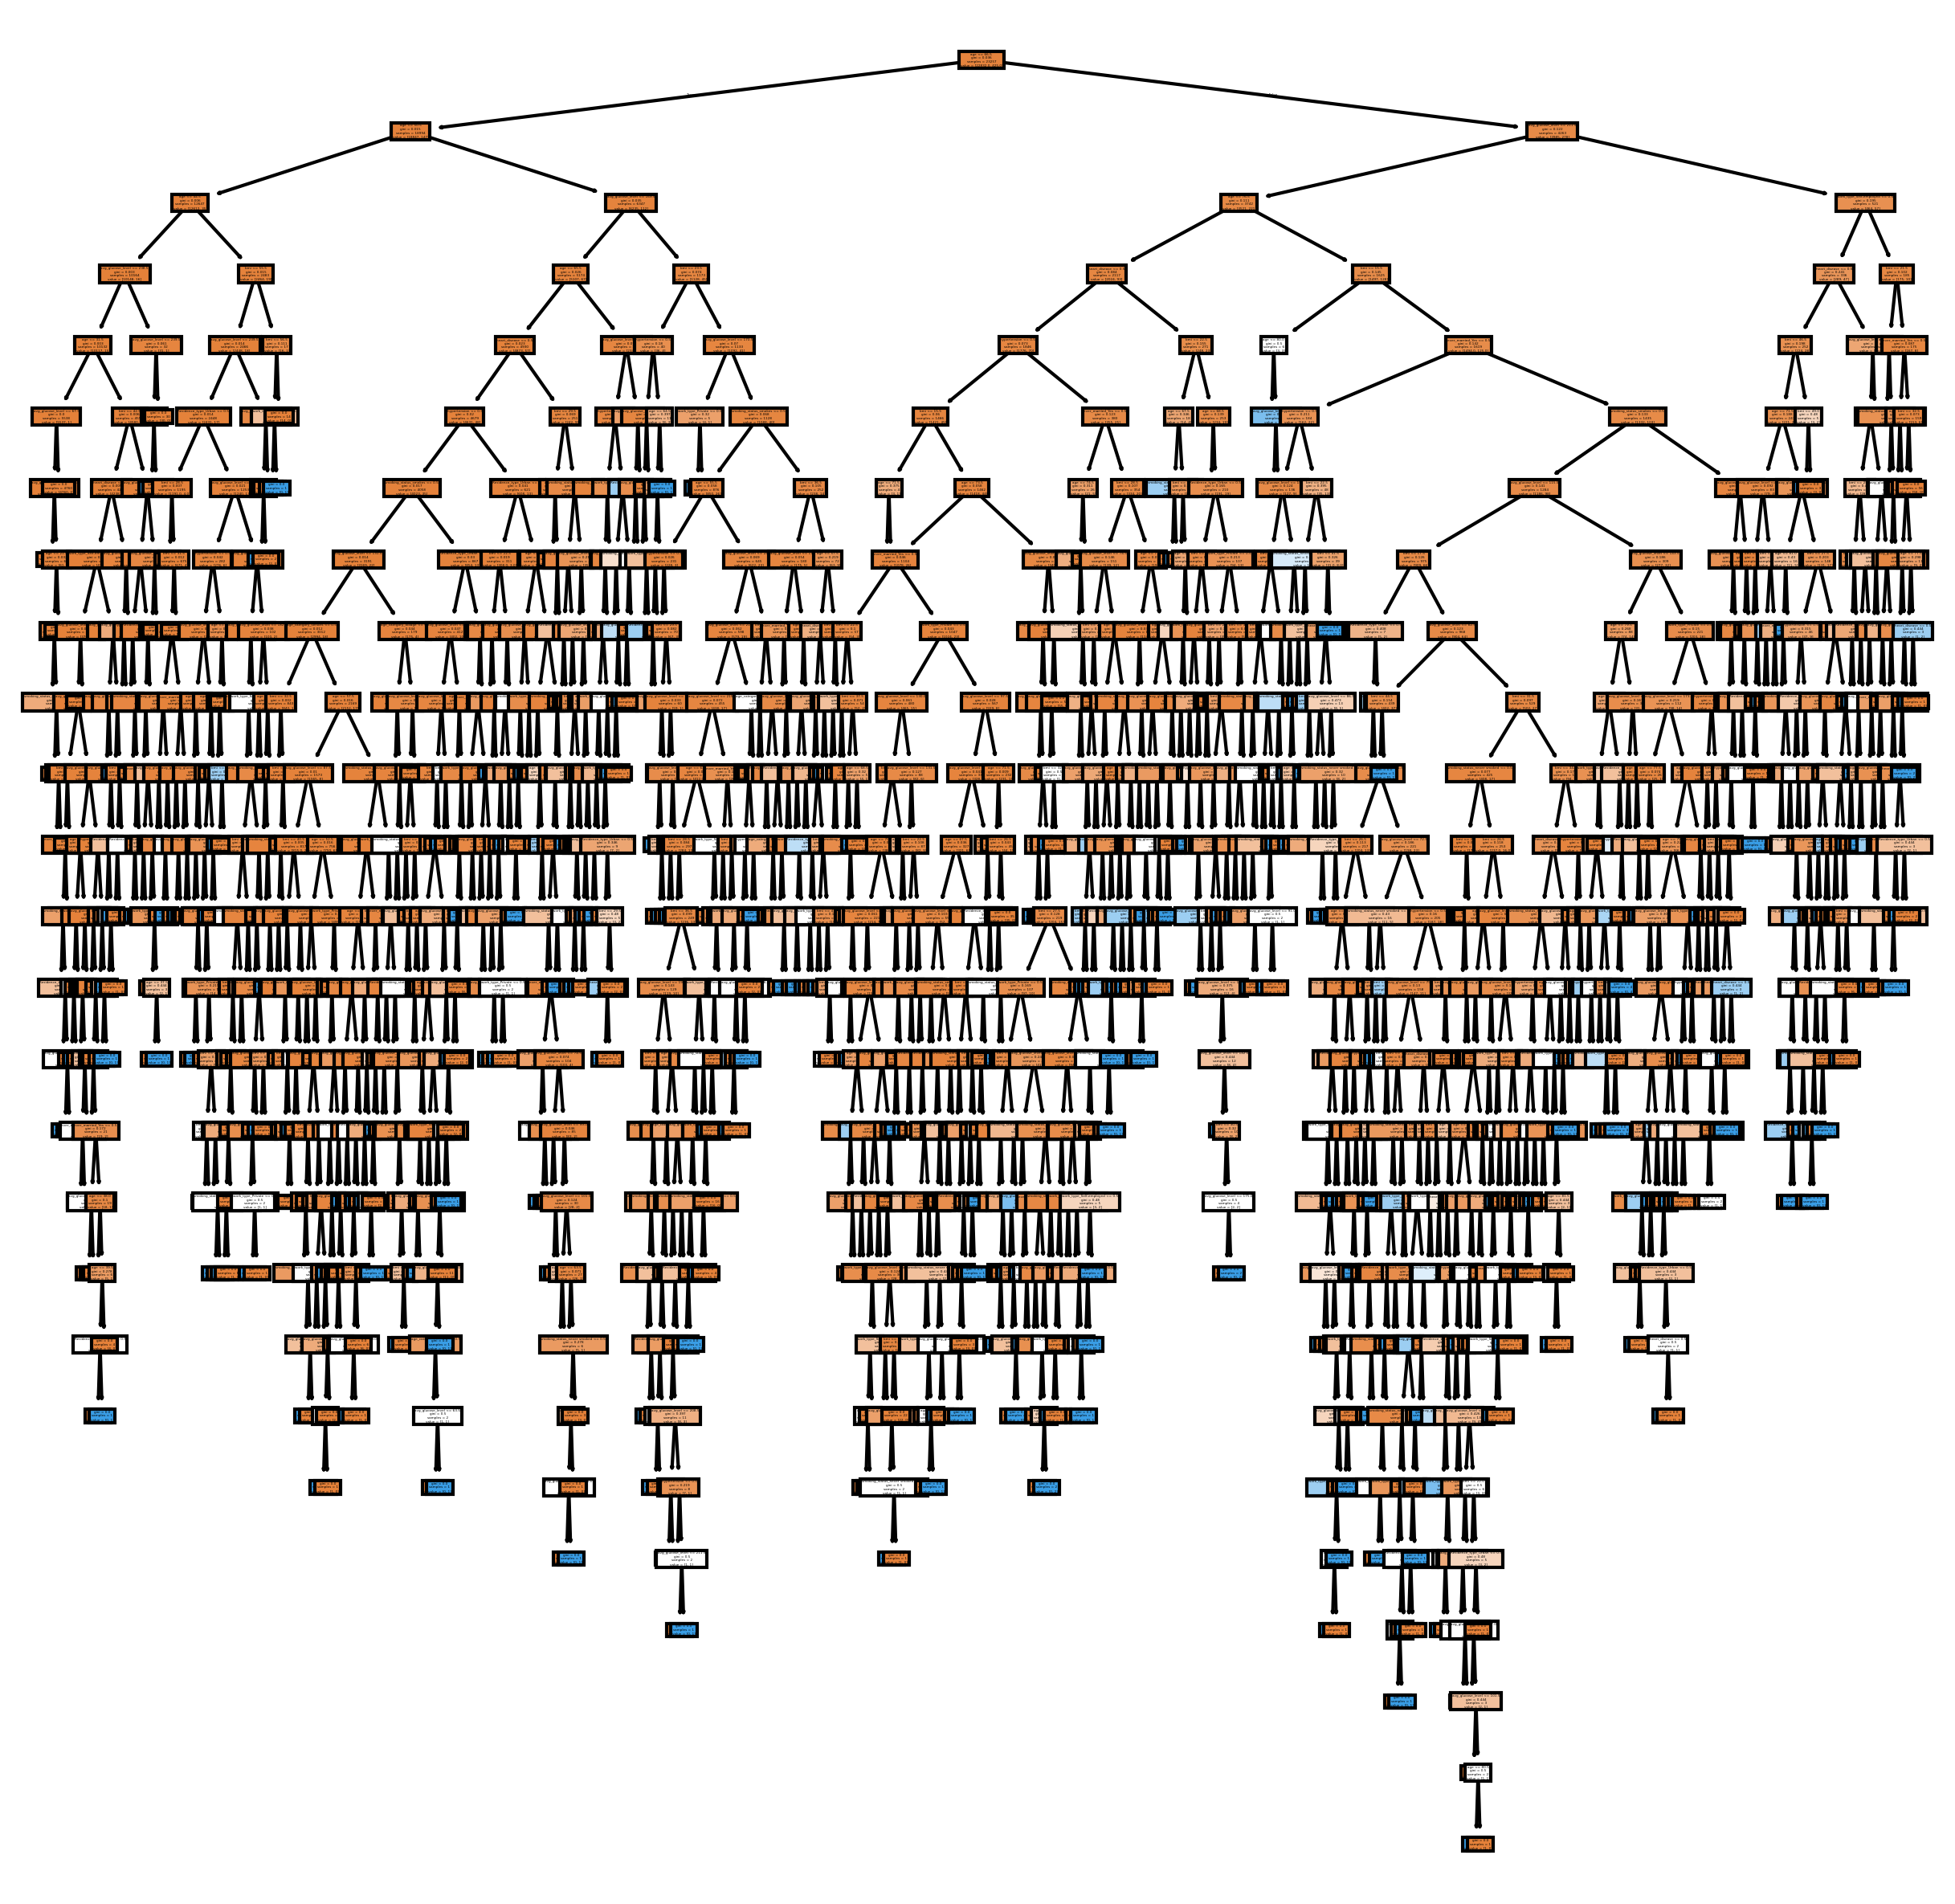

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,10),dpi = 300)
plot_tree(dt,
         filled = True,
         feature_names = x.columns
         )
plt.show()

# **DT Tunning**

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier()
params = {"criterion" : ["gini","entropy"], "max_depth" : list(range(1,30))}
grid = GridSearchCV(estimator,params,cv=5,scoring = "accuracy")
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 34 )

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 1)
dt.fit(x_train,y_train)

ypred_train = dt.predict(x_train)
ypred_test = dt.predict(x_test)

from sklearn.metrics import accuracy_score
print("test_acc ",accuracy_score(y_train,ypred_train))
print("train_acc ",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(dt,x_train,y_train,cv=5,scoring="accuracy").mean())

test_acc  0.9817259319774692
train_acc  0.9788478073946689
cv 0.9817259317747661


# **RandomForestCLassifier**

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 34)
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier(random_state = 34)
params = {"n_estimators" : list(range(1,13))}
grid = GridSearchCV(estimator,params,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid.best_params_


{'n_estimators': 12}

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 34 )

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 12,random_state = 34)
rf.fit(x_train,y_train)

ypred_train = rf.predict(x_train)
ypred_test = rf.predict(x_test)

from sklearn.metrics import accuracy_score
print("test_acc ",accuracy_score(y_train,ypred_train))
print("train_acc ",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(rf,x_train,y_train,cv=5,scoring="accuracy").mean())

test_acc  0.9957432170959281
train_acc  0.9785038693035254
cv 0.9808659663793307


# **AdaBootClassifier**

In [48]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier()
params = {"n_estimators": list(range(0,10))}
from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(estimator,params,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 1}

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
from sklearn.model_selection import GridSearchCV
params = {"n_estimators" : list(range(11)),
          "learning_rate" : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] }
grid = GridSearchCV(gb,params,cv = 5,scoring = "accuracy")
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.3, 'n_estimators': 2}

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 34 )

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 2,learning_rate = 0.3)
gb.fit(x_train,y_train)

ypred_train = rf.predict(x_train)
ypred_test = rf.predict(x_test)

from sklearn.metrics import accuracy_score
print("test_acc ",accuracy_score(y_train,ypred_train))
print("train_acc ",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(gb,x_train,y_train,cv=5,scoring="accuracy").mean())

test_acc  0.9957432170959281
train_acc  0.9785038693035254
cv 0.9817259317747661


In [52]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
estimator_xgb = XGBClassifier()
param_grid_xgb = {"n_estimators"  : list(range(11)),
                 # optional  "max_depth"     : list(range(1,21)),
                  "learning_rate" : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                  "gamma"         : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grid_gb = GridSearchCV(estimator_xgb,param_grid_xgb,scoring="accuracy",cv=5)
grid_gb.fit(x_train,y_train)
grid_gb.best_params_

{'gamma': 0.1, 'learning_rate': 0.1, 'n_estimators': 0}

In [53]:
# train_test_split with imp feauture columns

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=34)

#model with best hyperparameters
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.1,n_estimators= 0,gamma = 0.1)
xgb.fit(x_train,y_train)

# pridiction
ypred_train = xgb.predict(x_train)
ypred_test = xgb.predict(x_test)

# errors measurements
from sklearn.metrics import accuracy_score
print("Train Accuracy : ",accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CV Sore : ",cross_val_score(xgb,x_train,y_train,cv=5).mean())

from sklearn.metrics import accuracy_score
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))

Train Accuracy :  0.9817259319774692
CV Sore :  0.9817259317747661
Test Accuracy :  0.9788478073946689


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=34)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [55]:
import tensorflow as tf
import keras

In [ ]:
from keras.models import Sequential 
ann_model = Sequential()

from keras.layers import Dense

# adding input layer and one hidden layer
ann_model.add(Dense(input_dim = 18,units = 35, activation='relu',kernel_initializer = 'uniform'))
# uniform meansinitializing sarting weights range b/w ex: [-0.05 to +0.05]

# adding second hidden layer
ann_model.add(Dense(units = 35, activation = 'relu', kernel_initializer = 'uniform'))

# adding output layer
ann_model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))
# Apply sigmoid for output in 2 output classification this is fixed

# checking error
ann_model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
# for 2 calsses of classification projects
# binary crossentropy means miss classification errors

# for multi class loss = 'categorical_crossentropy' remains same like above

In [ ]:
# fit on train data

ann_model.fit(x_train, y_train, batch_size = 32, epochs = 100)

# prediction
ypred_train = ann_model.predict(x_train)
ypred_train = (ypred_train >= 0.5)

ypred_test = ann_model.predict(x_test)
ypred_test = (ypred_test >= 0.5)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("train_accuracy ",accuracy_score(y_train,ypred_train))
print("Test accuracy ",accuracy_score(y_test,ypred_test))

In [ ]:
confusion_matrix(y_test,ypred_test)

In [ ]:
# 
def build_cross_classifier():
    classifier = Sequential()
    classifier.add(Dense(input_dim = 18,units = 35, activation='relu',kernel_initializer = 'uniform'))
    classifier.add(Dense(units = 35, activation = 'relu', kernel_initializer = 'uniform'))
    classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
    
from scikeras.wrappers import KerasClassifier
classifier = KerasClassifier(build_cross_classifier(),batch_size = 32,epochs = 100)

# ippudu...buil cross classifier lo classifier undi mari classifier lo only connections unnayi batch and epochs levu kada so anni kalapadaniki kerasclassifier 

In [ ]:
from sklearn.model_selection import cross_val_score
print("cross_val_score ",cross_val_score(classifier,x_train,y_train,cv=5,scoring='accuracy').mean())

# **Final Conclusion**
# Random Forest CLassifier is the best for this dataset with
#  TEST ACCURACY  = 0.9957432170959281
#  TRAIN ACCURACY = 0.9785038693035254
#  CV SCORE       = 0.9817259317747661